## Introduction:
The goal of analyzing Fitbit data is to find trends and insights from the daily activity of users. It is also to find out how people tend to use fitbit devices and the correlation between different metrics that are measured by these devices.

## Analysis of the data:

### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
activity = pd.read_csv("https://raw.githubusercontent.com/srinijadharani/Projects-AY21-22/main/02%20Fitbit%20EDA/FitBit%20data.csv")

### Exploring the content of the dataset

In [5]:
activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


In [6]:
activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [8]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [9]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [10]:
len(activity.columns)

15

In [11]:
activity.shape

(457, 15)

In [12]:
activity1 = activity.copy()

In [13]:
activity1['ActivityDate'].unique()

array(['3/25/2016', '3/26/2016', '3/27/2016', '3/28/2016', '3/29/2016',
       '3/30/2016', '3/31/2016', '4/1/2016', '4/2/2016', '4/3/2016',
       '4/4/2016', '4/5/2016', '4/6/2016', '4/7/2016', '4/8/2016',
       '4/9/2016', '4/10/2016', '4/11/2016', '4/12/2016', '3/12/2016',
       '3/13/2016', '3/14/2016', '3/15/2016', '3/16/2016', '3/17/2016',
       '3/18/2016', '3/19/2016', '3/20/2016', '3/21/2016', '3/22/2016',
       '3/23/2016', '3/24/2016'], dtype=object)

### Modifying data in the dataset

In [14]:
# adding year, month, and date columns to the dataset
activity1['year'] = pd.DatetimeIndex(activity1['ActivityDate']).year
activity1['month'] = pd.DatetimeIndex(activity1['ActivityDate']).month
activity1['date'] = pd.DatetimeIndex(activity1['ActivityDate']).day

In [15]:
activity1.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3


In [16]:
activity1=activity1.drop(['TrackerDistance'],axis=1)
# we dont require the tracker distance column

In [18]:
activity1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29


In [19]:
import datetime as dt

### Data Visualization

Text(0.5, 1.0, 'Box plot of Calories with Jitter bu day of the month')

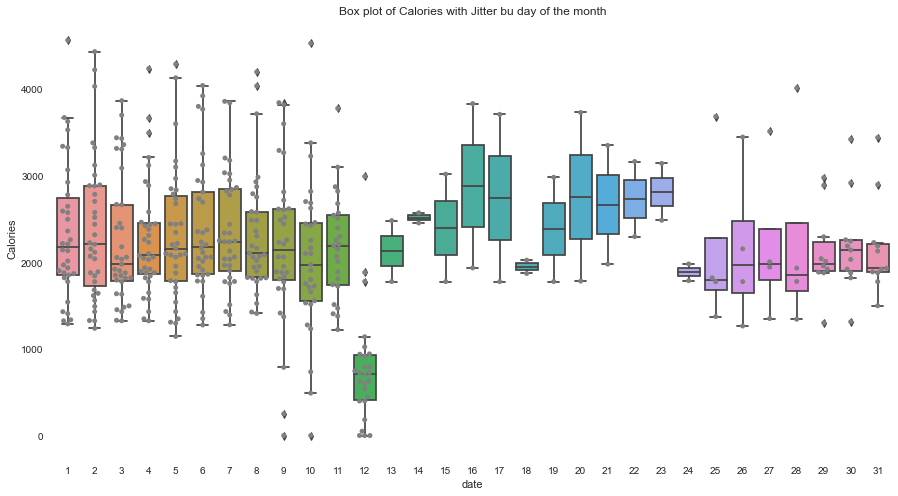

In [20]:
plt.figure(figsize=(15,8))
# boxplot
ax = sns.boxplot(x='date', y='Calories', data=activity1)
# add jitter with the swarmplot function
ax = sns.swarmplot(x='date', y='Calories', data=activity1, color="grey")
ax.set_title('Box plot of Calories with Jitter bu day of the month')

In [21]:
# converting datatype to datetime
activity1['Week'] = pd.to_datetime(activity1.ActivityDate).dt.week
activity1['Year'] = pd.to_datetime(activity1.ActivityDate).dt.year

In [22]:
activity1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,Week,Year
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12,2016
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12,2016
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12,2016
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13,2016
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13,2016


In [23]:
# converting to datetime
activity1['ActivityDate'] = pd.to_datetime(activity1['ActivityDate'])

In [24]:
# converting day of the week to name of the day
activity1['day'] = activity1['ActivityDate'].dt.day_name

In [25]:
activity1.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,Week,Year,day
0,1503960366,2016-03-25,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12,2016,<bound method PandasDelegate._add_delegate_acc...
1,1503960366,2016-03-26,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12,2016,<bound method PandasDelegate._add_delegate_acc...
2,1503960366,2016-03-27,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12,2016,<bound method PandasDelegate._add_delegate_acc...
3,1503960366,2016-03-28,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13,2016,<bound method PandasDelegate._add_delegate_acc...
4,1503960366,2016-03-29,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13,2016,<bound method PandasDelegate._add_delegate_acc...
5,1503960366,2016-03-30,10970,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30,13,2016,<bound method PandasDelegate._add_delegate_acc...
6,1503960366,2016-03-31,12256,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31,13,2016,<bound method PandasDelegate._add_delegate_acc...
7,1503960366,2016-04-01,12262,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1,13,2016,<bound method PandasDelegate._add_delegate_acc...
8,1503960366,2016-04-02,11248,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2,13,2016,<bound method PandasDelegate._add_delegate_acc...
9,1503960366,2016-04-03,10016,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3,13,2016,<bound method PandasDelegate._add_delegate_acc...


Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

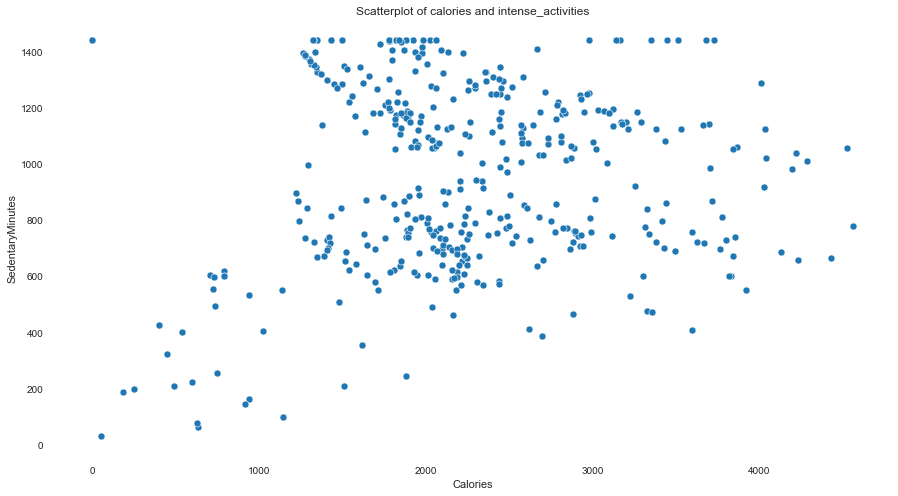

In [27]:
plt.figure(figsize=(15,8))

# basic scatterplot
ax = sns.scatterplot(x='Calories', y='SedentaryMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

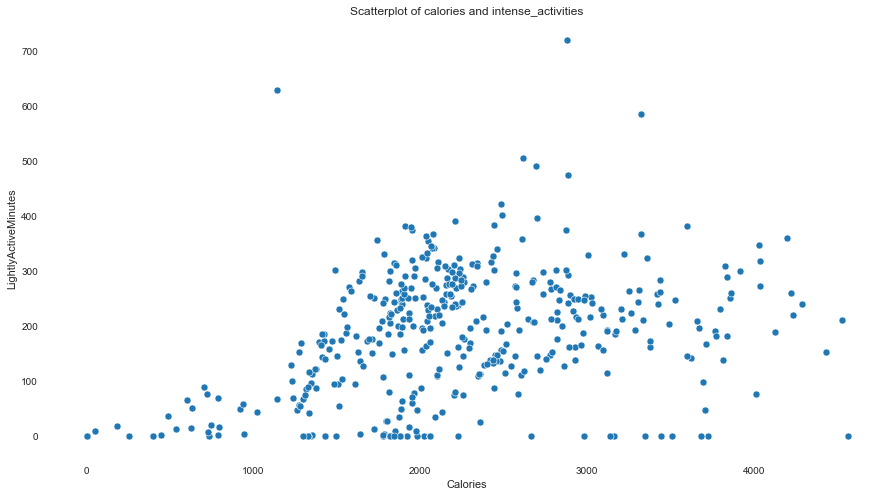

In [28]:
plt.figure(figsize=(15,8))

# scatterplot
ax = sns.scatterplot(x='Calories', y='LightlyActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories vs Fairly Active Minutes')

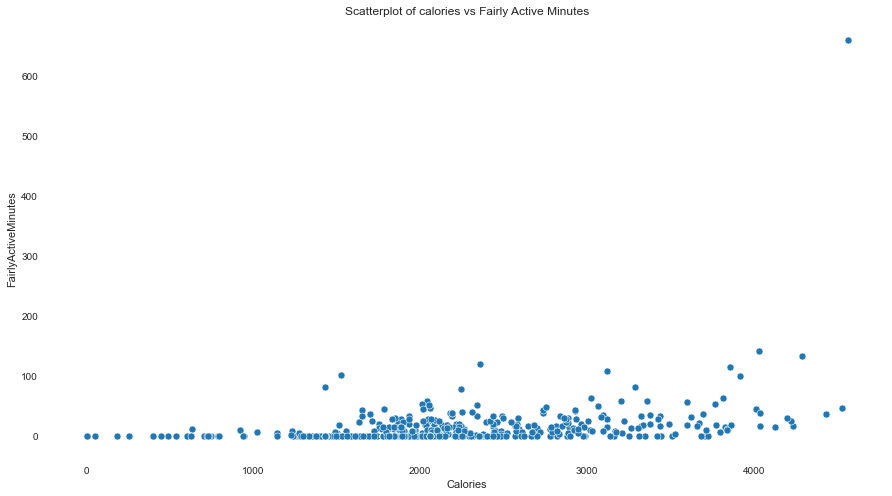

In [29]:
plt.figure(figsize=(15,8))

# scatterplot between calories burnt in the moderately active minutes
ax = sns.scatterplot(x='Calories', y='FairlyActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories vs Fairly Active Minutes')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

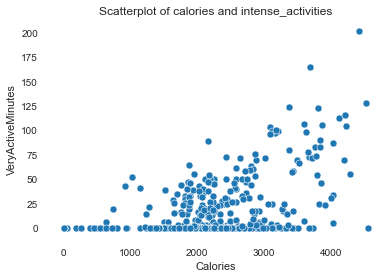

In [30]:
# scatterplot between calories burnt in the intensely active minutes
ax = sns.scatterplot(x='Calories', y='VeryActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

In [31]:
activity1=activity1.drop(['Week','Year'],axis=1)

In [32]:
activity1.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,day
0,1503960366,2016-03-25,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,<bound method PandasDelegate._add_delegate_acc...
1,1503960366,2016-03-26,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,<bound method PandasDelegate._add_delegate_acc...
2,1503960366,2016-03-27,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,<bound method PandasDelegate._add_delegate_acc...
3,1503960366,2016-03-28,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,<bound method PandasDelegate._add_delegate_acc...
4,1503960366,2016-03-29,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,<bound method PandasDelegate._add_delegate_acc...
5,1503960366,2016-03-30,10970,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30,<bound method PandasDelegate._add_delegate_acc...
6,1503960366,2016-03-31,12256,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31,<bound method PandasDelegate._add_delegate_acc...
7,1503960366,2016-04-01,12262,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1,<bound method PandasDelegate._add_delegate_acc...
8,1503960366,2016-04-02,11248,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2,<bound method PandasDelegate._add_delegate_acc...
9,1503960366,2016-04-03,10016,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3,<bound method PandasDelegate._add_delegate_acc...


Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on activity minutes')

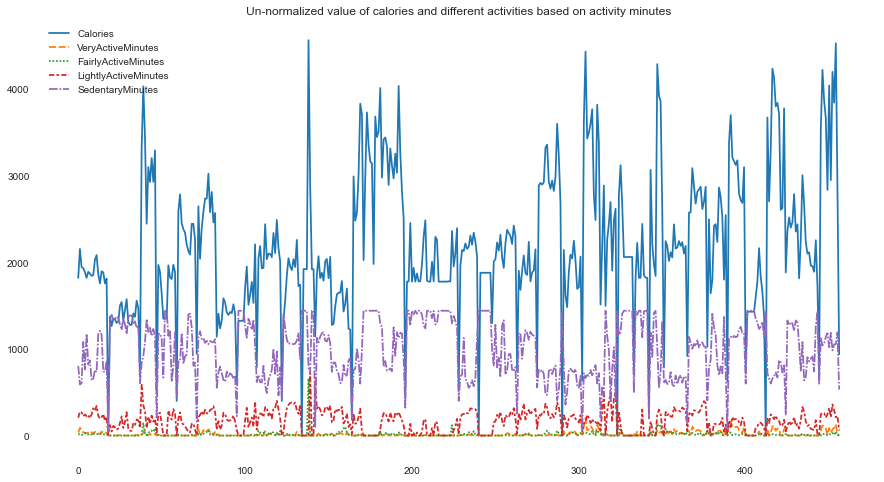

In [33]:
col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
wide_df = activity1[col_select]

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df)

ax.set_title('Un-normalized value of calories and different activities based on activity minutes')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

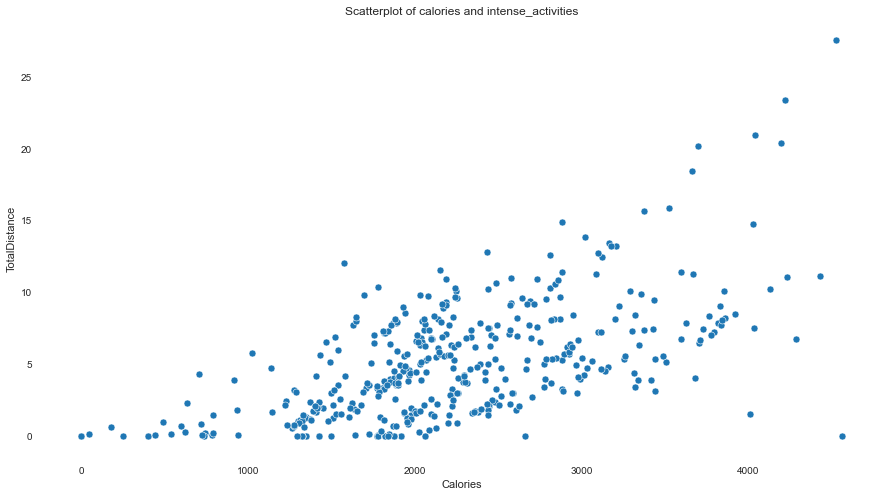

In [34]:
plt.figure(figsize=(15,8))

# scatterplot between  calories burnt and total distance covered
ax = sns.scatterplot(x='Calories', y='TotalDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

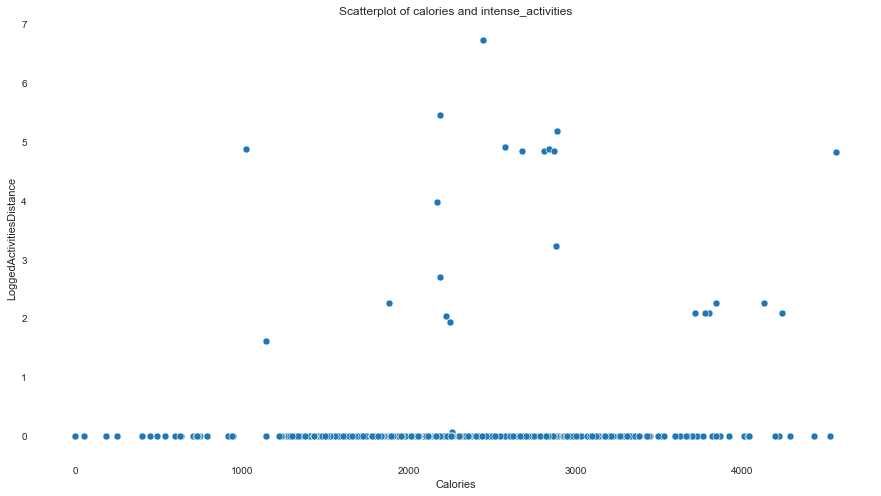

In [35]:
plt.figure(figsize=(15,8))

# scatterplot between calories burnt and the loggged activities distance
ax = sns.scatterplot(x='Calories', y='LoggedActivitiesDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

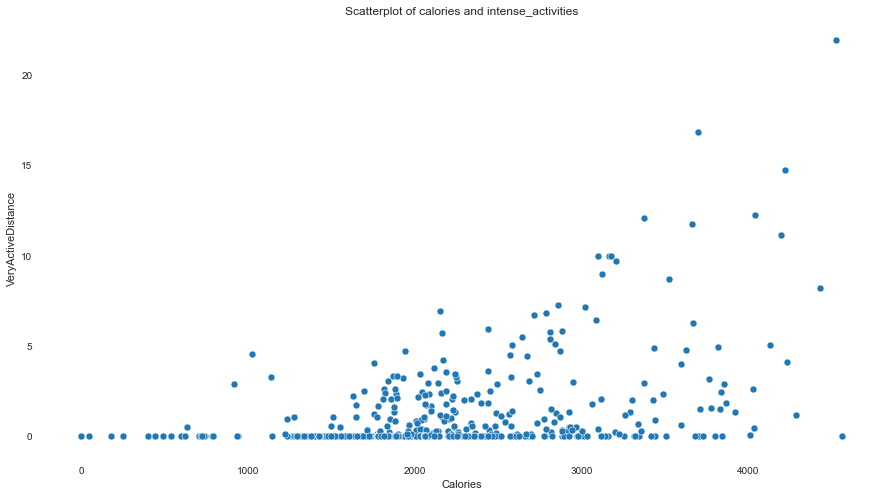

In [36]:
plt.figure(figsize=(15,8))

# scatterplot between calories burnt and the distance of intense activies
ax = sns.scatterplot(x='Calories', y='VeryActiveDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

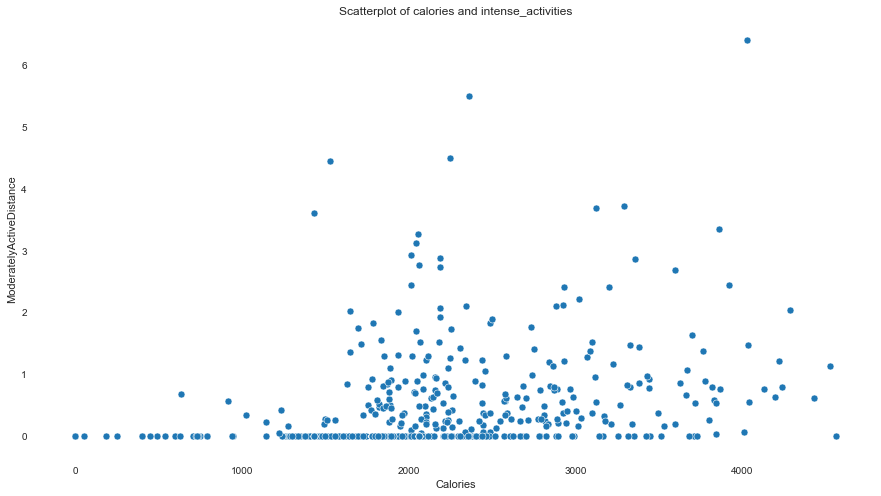

In [37]:
plt.figure(figsize=(15,8))

# scatterplot between calories burnt and the distance of moderate activies
ax = sns.scatterplot(x='Calories', y='ModeratelyActiveDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

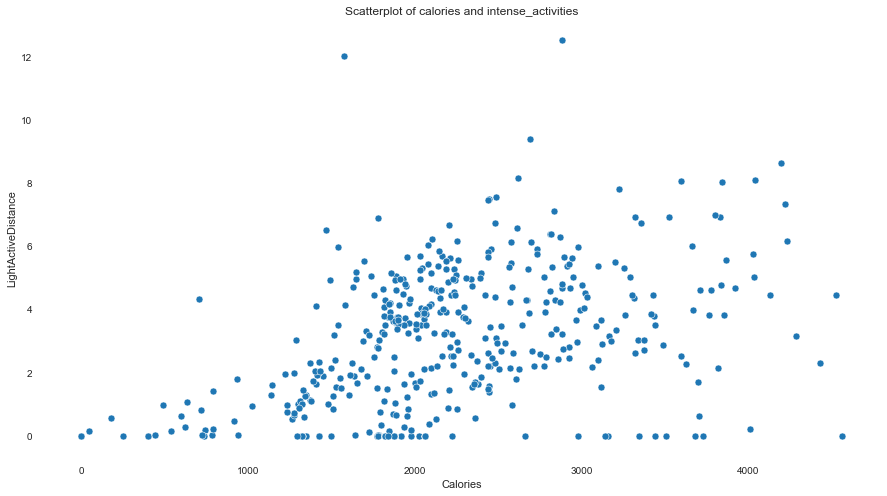

In [38]:
plt.figure(figsize=(15,8))

# scatterplot
ax = sns.scatterplot(x='Calories', y='LightActiveDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on distance')

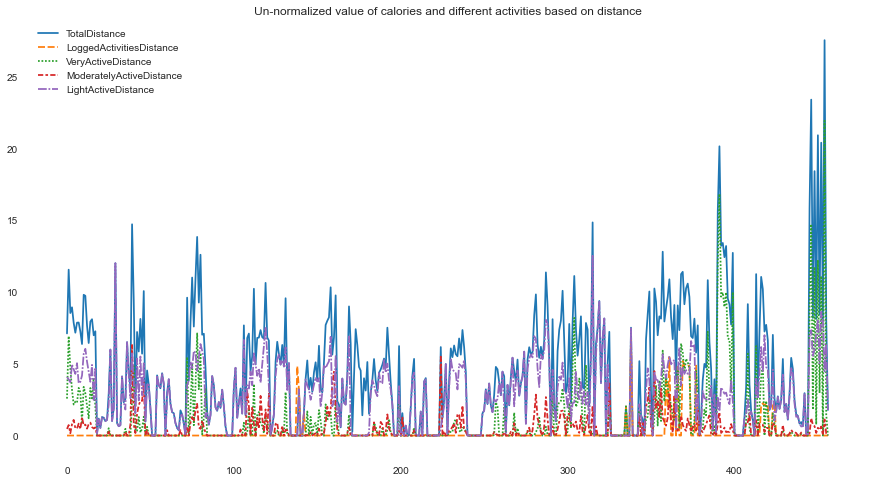

In [39]:
rol_select = ['TotalDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance', 'LightActiveDistance']
wide_df1 = activity1[rol_select]

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df1)

ax.set_title('Un-normalized value of calories and different activities based on distance')

### Conclusion

The EDA here gives us the insight about the relation between the active hours, the distance for which the user has moderate and intense activity and the calories burnt during that period.